In [1]:
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torchvision.transforms as T
import numpy as np
import matplotlib as plot
import os
import time

In [2]:
torch.cuda.set_device(1)

In [3]:
torch.cuda.current_stream()

<torch.cuda.Stream device=cuda:1 cuda_stream=0x0>

## We have trained our model in the segmentation-trainfile. 
## We load the '.pth' file and use it to predict our real image.

In [4]:
model_64 = models.segmentation.fcn_resnet101(pretrained = False,num_classes=64)
checkpoint = torch.load('ckpt.pth')
model_64.load_state_dict(checkpoint)
model_64.eval()
out = (model_64(torch.zeros(3,720,960).unsqueeze(dim=0))['out'])

In [5]:
print(out.shape)

torch.Size([1, 64, 720, 960])


In the **'semantic-segmentation_FCN-DeepLab_pyTorch.ipynb'**, there are 21 classes to predict. But when we deal with the input pictures from **'SYNTHIA_RAND_CVPR16_extract-100-images'**, there are different colors which means different classes.

According to this situation, we redefine the label colors **from 21 types to 64 types**.

In [6]:
label_colors = []
for i in range(4):
    for j in range(4):
        for k in range(4):
            label_colors.append((i*64,j*64,k*64))
print(len(label_colors))

64


In [7]:
def decode_segmap(image, nc=64):
    #from (h,w) to (h,w,3)
    rgb = np.zeros((720,960,3))
    for i in range(720):
        for j in range(960):
            rgb[i,j,:] = label_colors[int(image[i,j])]
    return rgb.astype(np.uint8)

In [8]:
def display(x):
    if len(x.shape) == 4:
        x = torch.argmax(x,dim=1)
    if len(x.shape) == 3:
        img = decode_segmap(x.squeeze().cpu().numpy())
    else:
        img = decode_segmap(x.numpy())
    plt.imshow(img)
    plt.show()

## Real image Case

In [9]:
Real_image = Image.open('real_image.jpg').convert("RGB")
Real_image = Real_image.resize((960,720),Image.ANTIALIAS)

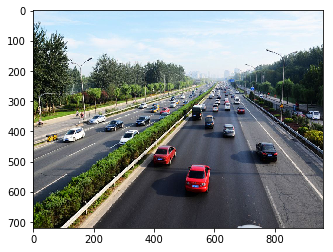

In [10]:
plt.imshow(Real_image)
plt.show()

In [11]:
trf = T.Compose([T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = trf(Real_image)

In [12]:
inp.size()

torch.Size([3, 720, 960])

In [13]:
out = (model_64(inp.unsqueeze(dim=0))['out'])
print(out.shape)

torch.Size([1, 64, 720, 960])


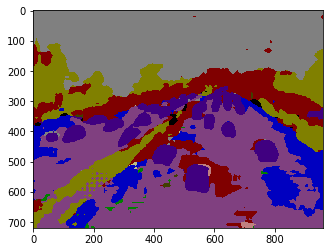

In [14]:
display(out)